In [1]:
from pathlib import Path

from experiment import Benchmark, Method, Model

seeds = [0, 137, 256]

/athenahomes/user/miniconda3/envs/track-generator/lib/python3.11/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: '/athenahomes/user/miniconda3/envs/track-generator/lib/python3.11/site-packages/torchvision/image.so: undefined symbol: _ZN3c1017RegisterOperatorsD1Ev'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(


In [3]:
model = Model.DISCRIMINATIVE_MEAN_FIELD
benchmark = Benchmark.SPLIT_MNIST
experiment_path = Path(
    "/scratch/shared/beegfs/user/experiments/vcl/custom/results"
)

models = {
    "VCL": (Method.VCL, None, None,),
    "VCL + Random Coreset": (Method.VCL_RANDOM_CORESET, 40, False),
    "VCL + K-Center Coreset": (Method.VCL_K_CENTER_CORESET, 40, False),
    "Random Coreset Only": (Method.RANDOM_CORESET, 40, True),
    "K-Center Coreset Only": (Method.K_CENTER_CORESET, 40, True),
    "EWC (lambda=1.0)": (Method.EWC, 40, True),
    "SI (lambda=1.0)": (Method.SI, 40, True),
}

accs = {}

In [4]:
import torch


df = {
    "method": [],
    "accuracy": [],
}

num_tasks = None

for (display_name, (method, coreset_size, coreset_balanced)) in models.items():



  if "coreset" in method:
      assert coreset_size is not None
      method_name = f"{method}_coreset_size={coreset_size}_coreset_balanced={coreset_balanced}"
  elif "ewc" in method:
      method_name = f"{method}_lambda={1.0}"
  elif "si" in method:
      method_name = f"{method}_lambda={1.0}"
  else:
      method_name = method

  method_histories = [
      experiment_path / benchmark / model / method_name / f"seed={seed}" / "history.pth"
      for seed in seeds
  ]

  matrix = []
  for (seed, path) in zip(seeds, method_histories):
      history = torch.load(path)
      matrix.append(history)
  num_tasks = 5
  df["method"].append(display_name)
  df["accuracy"].append(matrix)


/tmp/ipykernel_3041180/2991544279.py:32: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  history = torch.load(path)


In [5]:
df["method"][-1], df["accuracy"][-1]

('SI (lambda=1.0)',
 [[tensor([0.9995], dtype=torch.float64),
   tensor([0.9991, 0.9927], dtype=torch.float64),
   tensor([0.9991, 0.9907, 0.9979], dtype=torch.float64),
   tensor([0.9991, 0.9765, 0.9979, 0.9970], dtype=torch.float64),
   tensor([0.9986, 0.9843, 0.9637, 0.9854, 0.9894], dtype=torch.float64)],
  [tensor([0.9995], dtype=torch.float64),
   tensor([0.9995, 0.9946], dtype=torch.float64),
   tensor([0.9995, 0.9902, 0.9979], dtype=torch.float64),
   tensor([0.9995, 0.9525, 0.9957, 0.9980], dtype=torch.float64),
   tensor([0.9995, 0.9672, 0.9584, 0.9975, 0.9899], dtype=torch.float64)],
  [tensor([0.9995], dtype=torch.float64),
   tensor([0.9995, 0.9941], dtype=torch.float64),
   tensor([0.9995, 0.9833, 0.9979], dtype=torch.float64),
   tensor([0.9995, 0.9721, 0.9968, 0.9975], dtype=torch.float64),
   tensor([0.9986, 0.9687, 0.9781, 0.9945, 0.9904], dtype=torch.float64)]])

/tmp/ipykernel_3041180/3694659557.py:11: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  viridis = cm.get_cmap('viridis', len(df["method"]))


[(0, 1), (2, 3), (4, 5), (6, 7), (8, 9)]
Task 1, Method VCL:
[0.97535094 0.97437151 0.97257588 0.94090758]
---
Task 1, Method VCL + Random Coreset:
[0.97453475 0.97502446 0.96506691 0.9658831 ]
---
Task 1, Method VCL + K-Center Coreset:
[0.96980083 0.9701273  0.97584065 0.97192291]
---
Task 1, Method Random Coreset Only:
[0.94515179 0.94041787 0.93813252 0.93568395]
---
Task 1, Method K-Center Coreset Only:
[0.91413645 0.91380997 0.9134835  0.90417888]
---
Task 1, Method EWC (lambda=1.0):
[0.99510282 0.93388834 0.96555662 0.91903363]
---
Task 1, Method SI (lambda=1.0):
[0.99379692 0.9880836  0.9670258  0.97339209]
---
Task 2, Method VCL:
[0.99217357 0.99181783 0.99288507]
---
Task 2, Method VCL + Random Coreset:
[0.99252931 0.99235145 0.99128423]
---
Task 2, Method VCL + K-Center Coreset:
[0.98968337 0.99163995 0.98523655]
---
Task 2, Method Random Coreset Only:
[0.95055139 0.95393097 0.96086798]
---
Task 2, Method K-Center Coreset Only:
[0.85805762 0.88438276 0.88722871]
---
Task 2, M

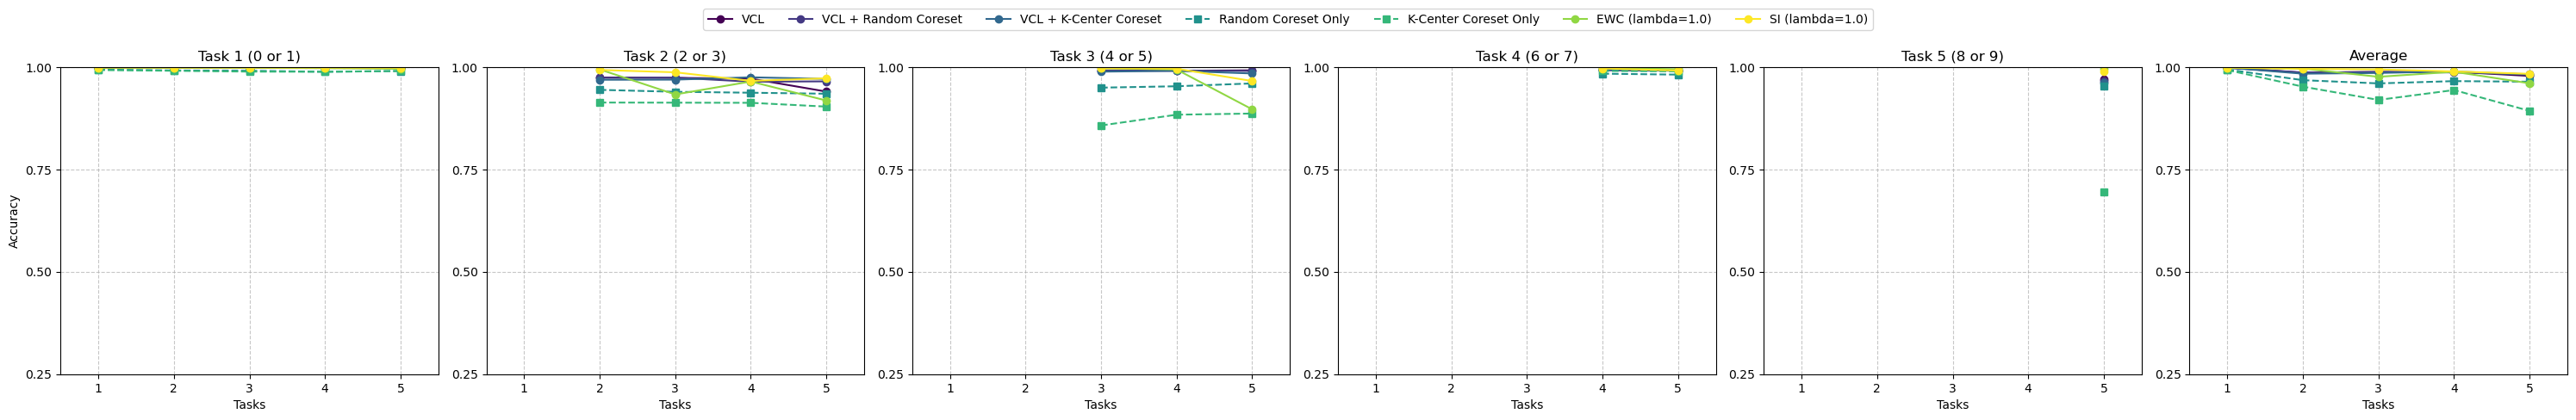

In [6]:
# Create a figure with subplots in a row
from matplotlib import cm, pyplot as plt
import numpy as np
import torch  # Add torch import

# Create figure with extra space for labels and legend
fig, axes = plt.subplots(1, num_tasks + 1, figsize=(5*(num_tasks+1), 5))
if num_tasks == 1:
    axes = [axes]  # Ensure axes is a list even with one subplot

viridis = cm.get_cmap('viridis', len(df["method"]))

# Store legend handles and labels
legend_handles = []
legend_labels = []

task_titles = list(zip(range(0, 10, 2), range(1, 10, 2)))

print(task_titles)

for task in range(num_tasks):
    ax = axes[task]
    
    # Always set x-ticks from 1 to 5 for all plots
    ax.set_xticks(np.arange(1, 6))
    
    # For plotting, still use the appropriate range
    x = np.arange(task + 1, 6)  # From task+1 to 5
    
    for i, (method, accuracies) in enumerate(zip(df["method"], df["accuracy"])):
        y = [[] for _ in range(5)]
        
        for seed_acc in accuracies:
            for observed_t, acc in enumerate(seed_acc):
                if task < len(acc):
                    y[observed_t].append(acc[task])
        
        if task > 0:
            print(f"Task {task}, Method {method}:")
            print(np.array(y[task:]).mean(axis=-1))
            print("---")
        
        line, = ax.plot(
            x,
            np.array(y[task:]).mean(axis=-1),
            marker='s' if "Only" in method else 'o',
            linestyle='--' if "Only" in method else '-',
            color=viridis(i),
            label=f'{method}'
        )
        
        # Only add to legend from first subplot to avoid duplicates
        if task == 0:
            legend_handles.append(line)
            legend_labels.append(method)
    
    ax.set_ylim(0.25, 1.0)
    ax.set_yticks(np.arange(0.25, 1.01, 0.25))
    ax.set_xlim(0.5, 5.5)  # Set consistent x-axis limits

    a, b = task_titles[task]

    ax.set_title(f'Task {task+1} ({a} or {b})')
    ax.grid(True, linestyle='--', alpha=0.7)
    
    # Add axis labels to each subplot
    ax.set_xlabel('Tasks')
    
    # Only add y-label to the first subplot to avoid redundancy
    if task == 0:
        ax.set_ylabel('Accuracy')


ax = axes[-1]

for i, (method, accuracies) in enumerate(zip(df["method"], df["accuracy"])):
    matrix = []
    for seed_accs in accuracies:
        matrix.append([a.mean() for a in seed_accs])
    matrix = torch.tensor(matrix)
    x = np.arange(1, 6)  # From task+1 to 5

    line, = ax.plot(
        x,
        matrix.mean(dim=0),
        marker='s' if "Only" in method else 'o',
        linestyle='--' if "Only" in method else '-',
        color=viridis(i),
        label=f'{method}'
    )

ax.set_ylim(0.25, 1.0)  # Set same y-limits as other plots
ax.set_yticks(np.arange(0.25, 1.01, 0.25))  # Use same y-ticks as other plots
ax.set_xlim(0.5, 5.5)  # Set consistent x-axis limits
ax.set_title(f'Average')
ax.grid(True, linestyle='--', alpha=0.7)

# Add axis labels to each subplot
ax.set_xlabel('Tasks')

# Create a shared legend at the top of the figure
fig.legend(
    legend_handles, 
    legend_labels,
    loc='upper center', 
    bbox_to_anchor=(0.5, 0.98),
    ncol=len(legend_handles),  # Put all items in one row
    frameon=True
)

# Adjust the subplot positions to make room for the legend and labels
plt.subplots_adjust(top=0.85, bottom=0.15)  # Adjust top and bottom margins
plt.tight_layout(rect=[0, 0, 1, 0.9])  # Adjust rect to exclude legend area from tight_layout
plt.show()

/tmp/ipykernel_3041180/3926828392.py:10: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  viridis = cm.get_cmap('viridis', len(df["method"]))


[(0, 1), (2, 3), (4, 5), (6, 7), (8, 9)]
Task 1, Method VCL:
[0.97535094 0.97437151 0.97257588 0.94090758]
---
Task 1, Method VCL + Random Coreset:
[0.97453475 0.97502446 0.96506691 0.9658831 ]
---
Task 1, Method VCL + K-Center Coreset:
[0.96980083 0.9701273  0.97584065 0.97192291]
---
Task 1, Method Random Coreset Only:
[0.94515179 0.94041787 0.93813252 0.93568395]
---
Task 1, Method K-Center Coreset Only:
[0.91413645 0.91380997 0.9134835  0.90417888]
---
Task 1, Method EWC (lambda=1.0):
[0.99510282 0.93388834 0.96555662 0.91903363]
---
Task 1, Method SI (lambda=1.0):
[0.99379692 0.9880836  0.9670258  0.97339209]
---
Task 2, Method VCL:
[0.99217357 0.99181783 0.99288507]
---
Task 2, Method VCL + Random Coreset:
[0.99252931 0.99235145 0.99128423]
---
Task 2, Method VCL + K-Center Coreset:
[0.98968337 0.99163995 0.98523655]
---
Task 2, Method Random Coreset Only:
[0.95055139 0.95393097 0.96086798]
---
Task 2, Method K-Center Coreset Only:
[0.85805762 0.88438276 0.88722871]
---
Task 2, M

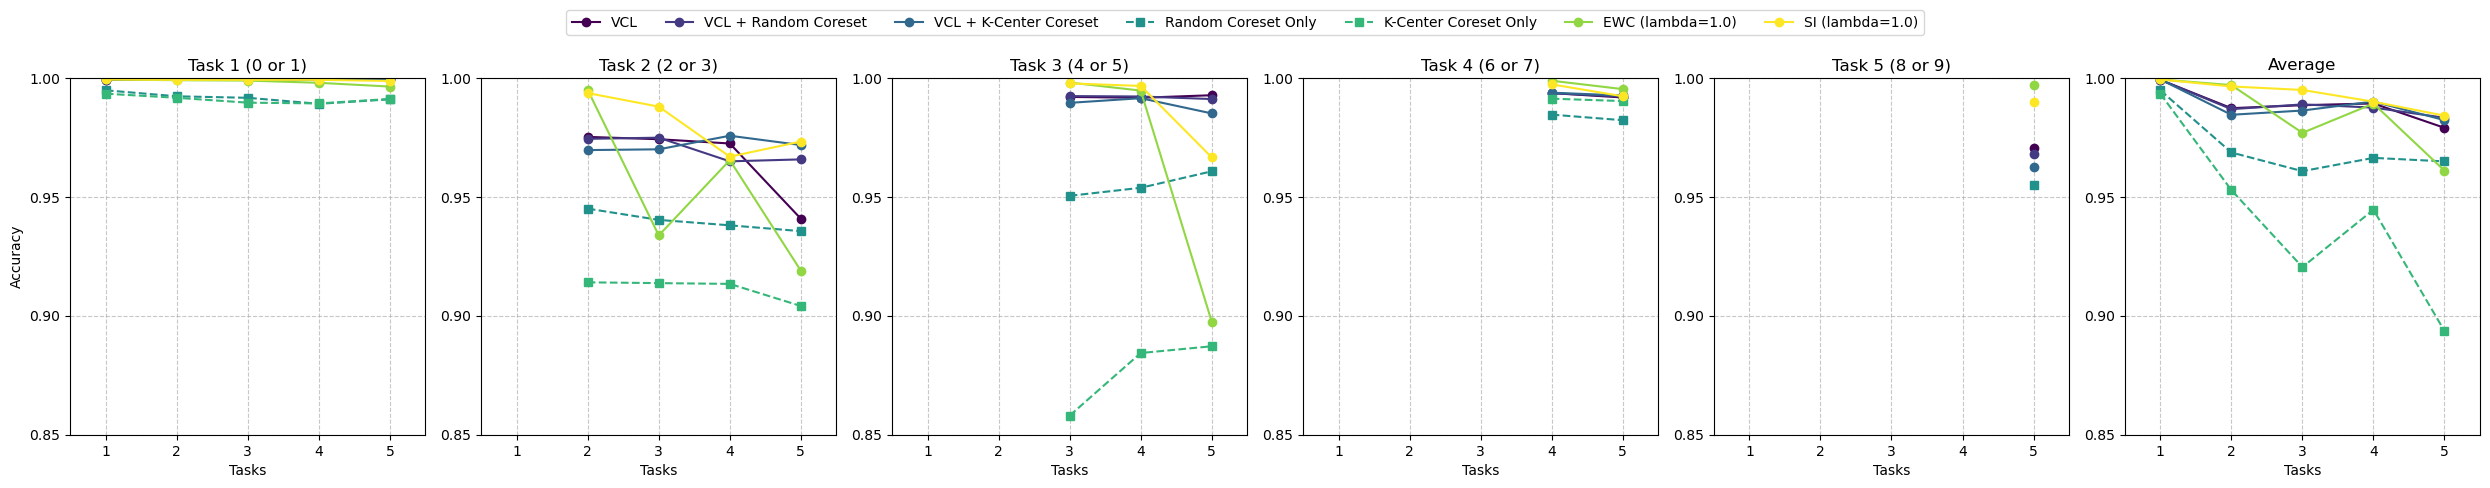

In [7]:
# Create a figure with subplots in a row
from matplotlib import cm, pyplot as plt
import numpy as np

# Create figure with extra space for labels and legend
fig, axes = plt.subplots(1, num_tasks + 1, figsize=(5*num_tasks, 5))
if num_tasks == 1:
    axes = [axes]  # Ensure axes is a list even with one subplot

viridis = cm.get_cmap('viridis', len(df["method"]))

# Store legend handles and labels
legend_handles = []
legend_labels = []

task_titles = list(zip(range(0, 10, 2), range(1, 10, 2)))


print(task_titles)

for task in range(num_tasks):
    ax = axes[task]
    
    # Always set x-ticks from 1 to 5 for all plots
    ax.set_xticks(np.arange(1, 6))
    
    # For plotting, still use the appropriate range
    x = np.arange(task + 1, 6)  # From task+1 to 5
    
    for i, (method, accuracies) in enumerate(zip(df["method"], df["accuracy"])):
        y = [[] for _ in range(5)]
        
        for seed_acc in accuracies:
            for observed_t, acc in enumerate(seed_acc):
                if task < len(acc):
                    y[observed_t].append(acc[task])
        
        if task > 0:
            print(f"Task {task}, Method {method}:")
            print(np.array(y[task:]).mean(axis=-1))
            print("---")
        
        line, = ax.plot(
            x,
            np.array(y[task:]).mean(axis=-1),
            marker='s' if "Only" in method else 'o',
            linestyle='--' if "Only" in method else '-',
            color=viridis(i),
            label=f'{method}'
        )
        
        # Only add to legend from first subplot to avoid duplicates
        if task == 0:
            legend_handles.append(line)
            legend_labels.append(method)
    
    ax.set_ylim(0.85, 1.0)
    ax.set_yticks(np.arange(0.85, 1.01, 0.05))
    ax.set_xlim(0.5, 5.5)  # Set consistent x-axis limits

    a, b = task_titles[task]

    ax.set_title(f'Task {task+1} ({a} or {b})')
    ax.grid(True, linestyle='--', alpha=0.7)
    
    # Add axis labels to each subplot
    ax.set_xlabel('Tasks')
    
    # Only add y-label to the first subplot to avoid redundancy
    if task == 0:
        ax.set_ylabel('Accuracy')


ax = axes[-1]

for i, (method, accuracies) in enumerate(zip(df["method"], df["accuracy"])):
    matrix = []
    for seed_accs in accuracies:
        matrix.append([a.mean() for a in seed_accs])
    matrix = torch.tensor(matrix)
    x = np.arange(1, 6)  # From task+1 to 5

    print("-----")
    print(method, matrix.mean(dim=0))
    print("-----")

    line, = ax.plot(
        x,
        matrix.mean(dim=0),
        marker='s' if "Only" in method else 'o',
        linestyle='--' if "Only" in method else '-',
        color=viridis(i),
        label=f'{method}'
    )
    
    # Only add to legend from first subplot to avoid duplicates
    if task == 0:
        legend_handles.append(line)
        legend_labels.append(method)

ax.set_ylim(0.85, 1.0)
ax.set_yticks(np.arange(0.85, 1.01, 0.05))
ax.set_xlim(0.5, 5.5)  # Set consistent x-axis limits
ax.set_title(f'Average')
ax.grid(True, linestyle='--', alpha=0.7)

# Add axis labels to each subplot
ax.set_xlabel('Tasks')

# Create a shared legend at the top of the figure
fig.legend(
    legend_handles, 
    legend_labels,
    loc='upper center', 
    bbox_to_anchor=(0.5, 0.98),
    ncol=len(legend_handles),  # Put all items in one row
    frameon=True
)

# Adjust the subplot positions to make room for the legend and labels
plt.subplots_adjust(top=0.85, bottom=0.15)  # Adjust top and bottom margins
plt.tight_layout(rect=[0, 0, 1, 0.9])  # Adjust rect to exclude legend area from tight_layout
plt.show()

In [8]:
from matplotlib.backends.backend_pdf import PdfPages

with PdfPages("split_mnist.pdf") as pdf:
    pdf.savefig(fig)  # Pass the figure explicitly
    plt.close(fig)
